<a href="https://colab.research.google.com/github/webostap/NIR/blob/master/comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from random import uniform, randint
import pandas as pd

# from SalesmanSimulatedAnnealing import Point, Path, SalesmanSimulatedAnnealing

In [ ]:
from math import exp
from random import uniform, randint
from itertools import permutations

import matplotlib.pyplot as plt
# %matplotlib inline

class Point:
    def __init__(self, ar):
        self.x = ar[0]
        self.y = ar[1]
        
    # def __init__(self, x, y):
    #     self.x = x
    #     self.y = y

    @staticmethod
    def distance(self, other):
        return ((self.x - other.x) ** 2 + (self.y - other.y) ** 2) ** 0.5



class Path:
    def __init__(self, array=None):
      
        self.points = array
        self.size = len(array)

    def length(self):
        result = 0
        for i in range(self.size):
            result += Point.distance(
                self.points[i], self.points[(i + 1) % self.size]
            )
        return result

    def draw(self, only_points=True, with_len=False):
      
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        plt.figure(figsize=(15, 7))
        plt.scatter(x, y, label="Points", color="black")
        if not only_points:
            plt.plot(x + [x[0]], y + [y[0]], label="points", color="green")
        if with_len:
            plt.title("Length = {}".format(self.length()))

        plt.legend()
        plt.show()

    def swap(self, i, j):
      
        self.points[i], self.points[j] = self.points[j], self.points[i]


class SalesmanSimulatedAnnealing:
    def __init__(
        self, start_state, t_start, t_min, t_change, energy, transition, limit
    ):
        """
        Потребуем, чтобы функция перехода возвращала функцию, применив которую, мы бы могли вернуться в
        предыдущее состояние. Это позволит нам не копировать массивы.
        """
        self.start_state = start_state  # начальное состояние
        self.t_start = t_start  # начальная температура
        self.t_min = t_min  # минимальная температура
        self.t_change = t_change  # функция изменения температуры
        self.energy = energy  # функция энергии
        self.transition = transition  # функция перехода в новое состояние
        self.limit = limit  # ограничение на количество итераций

    def calculate(self):
        step = 1
        current_t = self.t_start
        state = self.start_state
        current_energy = self.energy(self.start_state)
        while current_t > self.t_min and step < self.limit:
            transition_reverse = self.transition(state)  # переходим в новое сотояние
            new_energy = self.energy(state)
            d_energy = new_energy - current_energy
            if d_energy < 0 or (
                d_energy > 0 and exp(-d_energy / current_t) > uniform(0, 1)
            ):  # смотрим, могли ли мы
                current_energy = new_energy  # сделать этот переход
            else:  #  если не могли, то откатываемся назад
                transition_reverse(state)
            current_t = self.t_change(self.t_start, step)
            step += 1

        return state



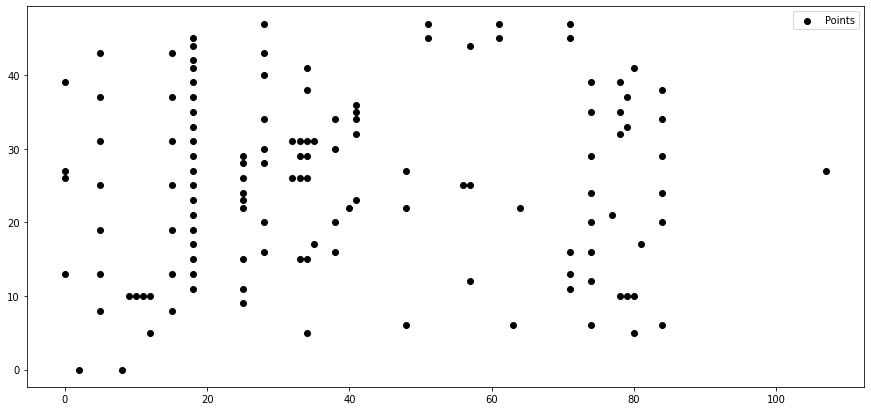

In [ ]:
points = [Point(list(map(int, line.split()[1:]))) for line in open('test.txt')]
test = Path(array=points)
test.draw()

In [ ]:
def energy(path):
    return path.length()


def t_change(t_start, step):
    return t_start/step


def transition(path):
    n = path.size
    i, j = randint(0, n - 1), randint(0, n - 1)
    path.swap(i, j)

    return lambda p: p.swap(i, j)

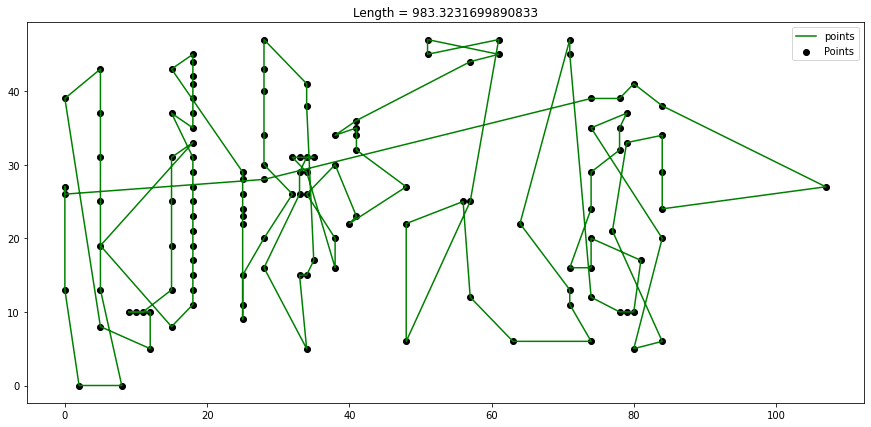

In [ ]:
sa = SalesmanSimulatedAnnealing(start_state=test,
                            t_start=10,
                            t_min=0.0001,
                            t_change=t_change,
                            energy=energy,
                            transition=transition,
                            limit=10000)


sa_path = sa.calculate()
sa_path.draw(only_points=False, with_len=True)

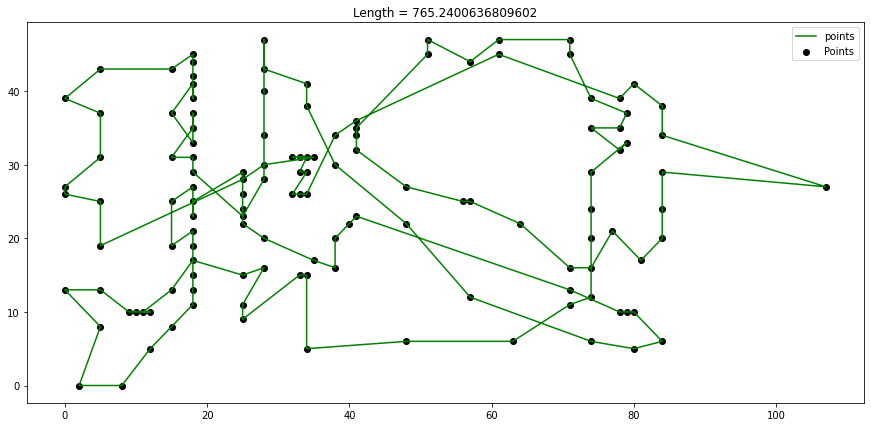

In [ ]:
def t_change(t_start, step):
    return t_start/step**0.4


sa = SalesmanSimulatedAnnealing(start_state=test,
                            t_start=300,
                            t_min=0,
                            t_change=t_change,
                            energy=energy,
                            transition=transition,
                            limit=1000000)


sa_path = sa.calculate()
sa_path.draw(only_points=False, with_len=True)

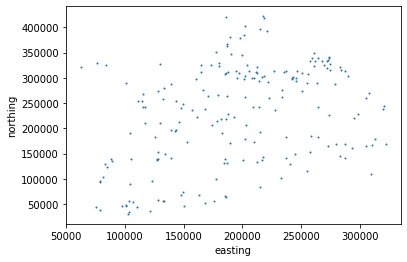

In [ ]:
df = pd.read_csv('ie-towns-sample.csv').sample(n=200)
df.plot.scatter(x='easting', y='northing', s=1)
points2 = [Point([row['easting'], row['northing']]) for i, row in df[['easting', 'northing']].iterrows()]

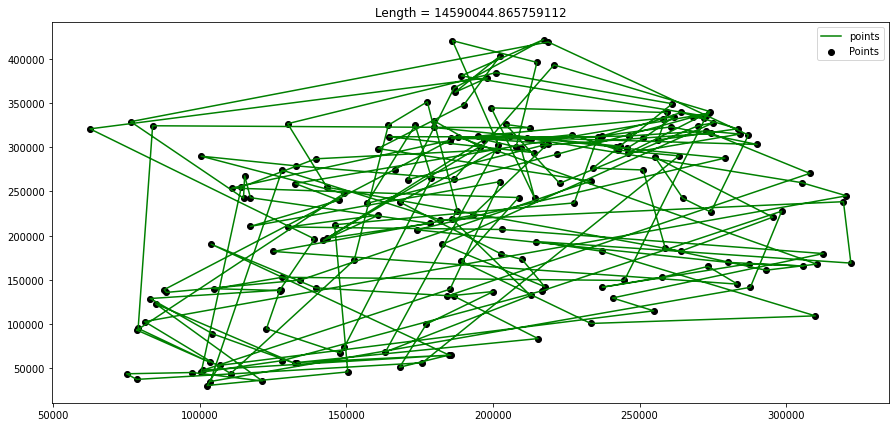

In [ ]:
ireland = Path(array=points2)
# ireland.draw()

def t_change(t_start, step): # возвращаем прежнее значение функции изменения температуры
    return t_start/step

sa = SalesmanSimulatedAnnealing(start_state=ireland,
                            t_start=10,
                            t_min=0.0001,
                            t_change=t_change,
                            energy=energy,
                            transition=transition,
                            limit=1000)


sa_path = sa.calculate()
sa_path.draw(only_points=False, with_len=True)

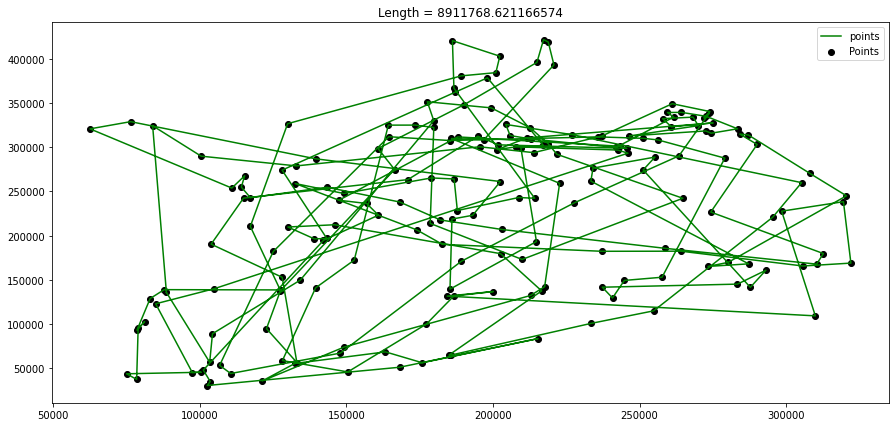

CPU times: user 9.39 s, sys: 41.9 ms, total: 9.44 s
Wall time: 9.47 s


In [ ]:
%%time
sa = SalesmanSimulatedAnnealing(start_state=ireland,
                            t_start=100,
                            t_min=0.0001,
                            t_change=t_change,
                            energy=energy,
                            transition=transition,
                            limit=10000)


sa_path = sa.calculate()
sa_path.draw(only_points=False, with_len=True)

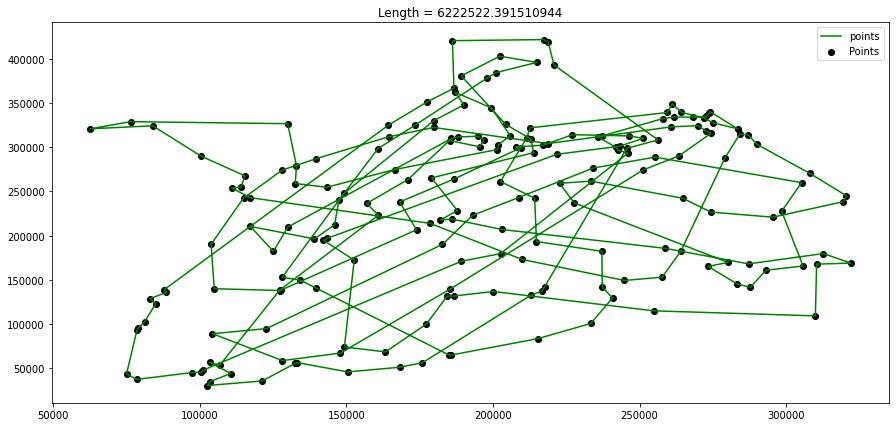

CPU times: user 1min 30s, sys: 221 ms, total: 1min 30s
Wall time: 1min 31s


In [ ]:
%%time
sa = SalesmanSimulatedAnnealing(start_state=ireland,
                            t_start=1000,
                            t_min=0.00001,
                            t_change=t_change,
                            energy=energy,
                            transition=transition,
                            limit=100000)


sa_path = sa.calculate()
sa_path.draw(only_points=False, with_len=True)

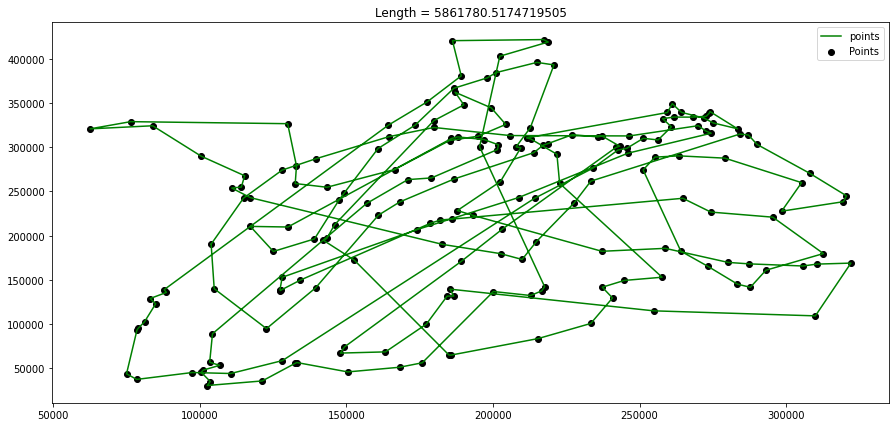

CPU times: user 14min 49s, sys: 1.74 s, total: 14min 51s
Wall time: 15min 5s


In [ ]:
%%time
sa = SalesmanSimulatedAnnealing(start_state=ireland,
                            t_start=5000,
                            t_min=0.0000005,
                            t_change=t_change,
                            energy=energy,
                            transition=transition,
                            limit=1000000)


sa_path = sa.calculate()
sa_path.draw(only_points=False, with_len=True)